In [1]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
pd.set_option('display.max_columns', None)

# clean training data
> has automated this process as `load_training_data()` in `project.py`

In [2]:
df = pd.read_csv('./data/train.csv')
y = df.Survived
df.drop('Survived', axis=1, inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# clean NaN for each feature

In [3]:
df.isnull().apply(np.sum)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age

/home/lucas/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


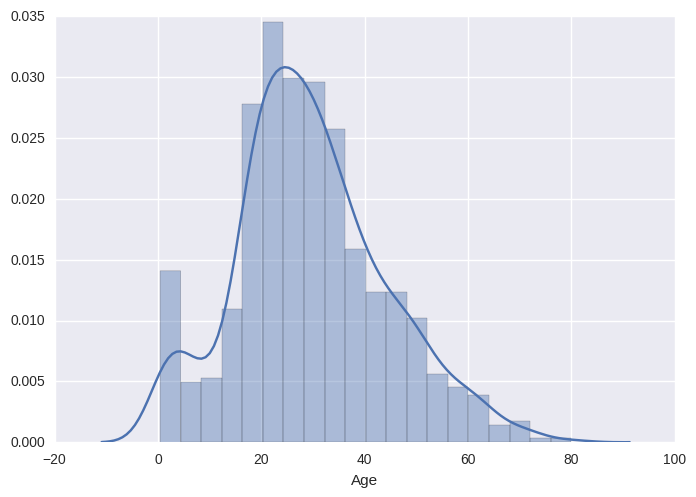

In [4]:
sns.distplot(df.Age.dropna())

1. weird first bin.. many new born?
2. if we ignore the first bin, almost normal distribution, I guess use `mean` to replace NaN for `Age` is fine

In [5]:
df.Age.fillna(value=df.Age.mean(), inplace=True)

### Cabin
is total mess...

In [6]:
# just choose D for default value, we will see how it goes
df.Cabin.fillna(value='D', inplace=True)

### Embarked
randomly choose it to be C

In [7]:
df.Embarked.fillna(value='C', inplace=True)

check NaN again

In [8]:
df.isnull().apply(np.sum).sum()

0

# label encoding  
Transform categorical data to numbers

For categorical data, we have: **Name, Sex, Cabin, Embarked**, let's translate them.

In [9]:
categorical = ['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket']
df_cat = df[categorical]
df_cat.head()

,Name,Sex,Cabin,Embarked,Ticket
0,"Braund, Mr. Owen Harris",male,D,S,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,PC 17599
2,"Heikkinen, Miss. Laina",female,D,S,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,113803
4,"Allen, Mr. William Henry",male,D,S,373450


In [10]:
le = LabelEncoder()
df_encoded = df_cat.apply(le.fit_transform)
df_encoded.head()

,Name,Sex,Cabin,Embarked,Ticket
0,108,1,90,2,523
1,190,0,81,0,596
2,353,0,90,2,669
3,272,0,55,2,49
4,15,1,90,2,472


In [11]:
df_rest = df.drop(categorical, axis=1)
df_rest.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


# concat categorical and numerical data

In [12]:
X = pd.concat([df_rest, df_encoded], axis=1)
assert X.shape == df.shape

In [13]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Cabin,Embarked,Ticket
0,1,3,22.0,1,0,7.2500,108,1,90,2,523
1,2,1,38.0,1,0,71.2833,190,0,81,0,596
2,3,3,26.0,0,0,7.9250,353,0,90,2,669
3,4,1,35.0,1,0,53.1000,272,0,55,2,49
4,5,3,35.0,0,0,8.0500,15,1,90,2,472


In [14]:
X.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int64
Sex              int64
Cabin            int64
Embarked         int64
Ticket           int64
dtype: object